In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arhamrumi/amazon-product-reviews")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/amazon-product-reviews


In [ ]:
import pandas as pd

try:
    df = pd.read_csv(f"{path}/Reviews.csv")
    print(df.head(21))
except FileNotFoundError:
    print(f"Error: 'amazon_product_reviews.csv' not found in the downloaded path.")
    print("Please check the contents of the downloaded dataset and adjust the filename.")
except Exception as e:
    print(f"An error occurred while reading the CSV file: {e}")

    Id   ProductId          UserId                      ProfileName  \
0    1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1    2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2    3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3    4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4    5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
5    6  B006K2ZZ7K   ADT0SRK1MGOEU                   Twoapennything   
6    7  B006K2ZZ7K  A1SP2KVKFXXRU1                David C. Sullivan   
7    8  B006K2ZZ7K  A3JRGQVEQN31IQ               Pamela G. Williams   
8    9  B000E7L2R4  A1MZYO9TZK0BBI                         R. James   
9   10  B00171APVA  A21BT40VZCCYT4                    Carol A. Reed   
10  11  B0001PB9FE  A3HDKO7OW0QNK4                     Canadian Fan   
11  12  B0009XLVG0  A2725IB4YY9JEB           A Poeng "SparkyGoHome"   
12  13  B0009XLVG0   A327PCT23YH90                               LT   
13  14

In [ ]:
df_subset = df[['ProductId', 'ProfileName', 'Score', 'Summary', 'Text']].head(10)
df_subset

,ProductId,ProfileName,Score,Summary,Text
0,B001E4KFG0,delmartian,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,dll pa,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,"Natalia Corres ""Natalia Corres""",4,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,Karl,2,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,"Michael D. Bigham ""M. Wassir""",5,Great taffy,Great taffy at a great price. There was a wid...
5,B006K2ZZ7K,Twoapennything,4,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,B006K2ZZ7K,David C. Sullivan,5,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,B006K2ZZ7K,Pamela G. Williams,5,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,B000E7L2R4,R. James,5,Yay Barley,Right now I'm mostly just sprouting this so my...
9,B00171APVA,Carol A. Reed,5,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [ ]:
df_sorted = df_subset.sort_values(by='ProductId')
df_sorted

,ProductId,ProfileName,Score,Summary,Text
8,B000E7L2R4,R. James,5,Yay Barley,Right now I'm mostly just sprouting this so my...
2,B000LQOCH0,"Natalia Corres ""Natalia Corres""",4,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,Karl,2,Cough Medicine,If you are looking for the secret ingredient i...
9,B00171APVA,Carol A. Reed,5,Healthy Dog Food,This is a very healthy dog food. Good for thei...
0,B001E4KFG0,delmartian,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
4,B006K2ZZ7K,"Michael D. Bigham ""M. Wassir""",5,Great taffy,Great taffy at a great price. There was a wid...
5,B006K2ZZ7K,Twoapennything,4,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,B006K2ZZ7K,David C. Sullivan,5,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,B006K2ZZ7K,Pamela G. Williams,5,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
1,B00813GRG4,dll pa,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [ ]:
!pip install langchain_community
!pip install replicate

In [ ]:
from langchain_community.llms import Replicate
import os
from google.colab import userdata
# Set the API token
api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token
# Model setup
model = "ibm-granite/granite-3.3-8b-instruct"
output = Replicate(
model=model,
replicate_api_token=api_token,
)

In [ ]:
df_selected_columns = df_sorted[['ProductId', 'ProfileName', 'Text']]
df_selected_columns

,ProductId,ProfileName,Text
8,B000E7L2R4,R. James,Right now I'm mostly just sprouting this so my...
2,B000LQOCH0,"Natalia Corres ""Natalia Corres""",This is a confection that has been around a fe...
3,B000UA0QIQ,Karl,If you are looking for the secret ingredient i...
9,B00171APVA,Carol A. Reed,This is a very healthy dog food. Good for thei...
0,B001E4KFG0,delmartian,I have bought several of the Vitality canned d...
4,B006K2ZZ7K,"Michael D. Bigham ""M. Wassir""",Great taffy at a great price. There was a wid...
5,B006K2ZZ7K,Twoapennything,I got a wild hair for taffy and ordered this f...
6,B006K2ZZ7K,David C. Sullivan,This saltwater taffy had great flavors and was...
7,B006K2ZZ7K,Pamela G. Williams,This taffy is so good. It is very soft and ch...
1,B00813GRG4,dll pa,Product arrived labeled as Jumbo Salted Peanut...


In [ ]:
df_sorted_productid = df_selected_columns.sort_values(by='ProductId')
df_sorted_productid


,ProductId,ProfileName,Text
8,B000E7L2R4,R. James,Right now I'm mostly just sprouting this so my...
2,B000LQOCH0,"Natalia Corres ""Natalia Corres""",This is a confection that has been around a fe...
3,B000UA0QIQ,Karl,If you are looking for the secret ingredient i...
9,B00171APVA,Carol A. Reed,This is a very healthy dog food. Good for thei...
0,B001E4KFG0,delmartian,I have bought several of the Vitality canned d...
4,B006K2ZZ7K,"Michael D. Bigham ""M. Wassir""",Great taffy at a great price. There was a wid...
5,B006K2ZZ7K,Twoapennything,I got a wild hair for taffy and ordered this f...
6,B006K2ZZ7K,David C. Sullivan,This saltwater taffy had great flavors and was...
7,B006K2ZZ7K,Pamela G. Williams,This taffy is so good. It is very soft and ch...
1,B00813GRG4,dll pa,Product arrived labeled as Jumbo Salted Peanut...


In [ ]:
from typing import Text
formatted_prompt_template = """
Classify this review as Positive, Negative, or Mixed, and tag
relevant categories. Use this format: - Sentiment: [Sentiment] - Categories: [Categories]
{review_text}
"""
results = []
for index, row in df_selected_columns.iterrows():
    review_text = row['Text']
    formatted_prompt = formatted_prompt_template.format(review_text=review_text)
    try:
        response = output.invoke(formatted_prompt)
        results.append({"ProductId": row["ProductId"], "ProfileName": row["ProfileName"], "ReviewText": review_text, "SentimentAnalysis": response})
    except Exception as e:
        print(f"Error processing review for ProductId {row['ProductId']}: {e}")
        results.append({"ProductId": row["ProductId"], "ProfileName": row["ProfileName"], "ReviewText": review_text, "SentimentAnalysis": f"Error: {e}"})
# Print the results
for result in results:
    print(f"Product ID: {result['ProductId']}")
    print(f"Profile Name: {result['ProfileName']}")
    print(f"Review Text: {result['ReviewText']}")
    print(f"Sentiment Analysis: {result['SentimentAnalysis']}\n")

# Define the parameters dictionary
parameters = {
    "max_new_tokens": 500, # Adjust this value as needed
    "min_new_tokens": 1,
    "temperature": 0.1,
    "random_seed": 42
}

Product ID: B000E7L2R4
Profile Name: R. James
Review Text: Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too
Sentiment Analysis: - Sentiment: Positive - Categories: Pet Care, Pet Food, Grass/Sprouting for Pets

Product ID: B000LQOCH0
Profile Name: Natalia Corres "Natalia Corres"
Review Text: This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.
Sentiment Analysis: - Sentiment: Positive
- Categories: Traditional confection, Citrus gelatin, Nuts (Filberts), Po

In [ ]:
formatted_prompt_template_analysis = """
Analisis ulasan produk berikut untuk mengidentifikasi produk mana yang paling direkomendasikan untuk dibeli. Berikan ringkasan analisis dan daftar ProductId dari produk yang paling direkomendasikan.
sajikan outbut berupa dataframe dengan 3 kolom yaitu ProductId, Recomendation Level, dan Reason.
lalu pada kolom recomendation level berikan integer saja
dengan highly recomended =  4
recomended = 3
neutral = 2
not recomended 1
Ulasan Produk:
{product_reviews_indo}

Analisis dan Rekomendasi Produk:
"""
combined_reviews_indo = ""
for index, row in df_sorted_productid.iterrows():
    combined_reviews_indo += f"Product ID: {row['ProductId']}\nUlasan: {row['Text']}\n\n"

formatted_prompt_analysis = formatted_prompt_template_analysis.format(product_reviews_indo=combined_reviews_indo)

try:
    analysis_response = output.invoke(formatted_prompt_analysis)
    print("\nHasil Analisis dan Rekomendasi Produk:")
    print(analysis_response)
except Exception as e:
    print(f"Error performing analysis: {e}")



Hasil Analisis dan Rekomendasi Produk:
| ProductId          | Recomendation Level | Reason                                                                                      |
|-------------------|---------------------|------------------------------------------------------------------------------------------------|
| B000LQOCH0        | 4 (Highly Recommended) | The reviewer highly praises the product, describing it as a "tiny mouthful of heaven" with great flavor and texture. |
| B006K2ZZ7K        | 4 (Highly Recommended) | Multiple reviews indicate the taffy has great flavors, is soft and chewy, well-wrapped, and very satisfying. |
| B001E4KFG0        | 3 (Recommended)      | The reviewer expresses satisfaction with the dog food quality, noting its appealing appearance and smell, as well as their finicky Labrador's appreciation. |
| B000E7L2R4        | 2 (Neutral)         | The product is recommended for cat consumption as a healthy grass alternative, but there's no strong endorsem

In [ ]:
print (analysis_response)


Hasil Analisis dan Rekomendasi Produk:
| ProductId         | Recommendation Level | Reason                                                                 |
|-------------------|---------------------|-------------------------------------------------------------------------|
| B006K2ZZ7K        | 4                   | Multiple positive reviews highlighting great flavors, soft texture, and good value. Highly recommended for taffy lovers. |
| B000LQOCH0        | 4                   | High praise for its taste, described as "tiny mouthful of heaven," and a long history, making it highly recommended. |
| B001E4KFG0        | 3                   | Positive reviews about the quality, appearance, and smell of the dog food, making it recommended for finicky dogs. |
| B000E7L2R4        | 2                   | Mentioned as a product for cat grass, no specific recommendation for human consumption. |
| B000UA0QIQ        | 1                   | The medicinal flavor described, suggesting it's not hig

In [ ]:
import io

analysis_response = """
Hasil Analisis dan Rekomendasi Produk:
| ProductId         | Recommendation Level | Reason                                                                 |
|-------------------|---------------------|-------------------------------------------------------------------------|
| B006K2ZZ7K        | 4                   | Multiple positive reviews highlighting great flavors, soft texture, and good value. Highly recommended for taffy lovers. |
| B000LQOCH0        | 4                   | High praise for its taste, described as "tiny mouthful of heaven," and a long history, making it highly recommended. |
| B001E4KFG0        | 3                   | Positive reviews about the quality, appearance, and smell of the dog food, making it recommended for finicky dogs. |
| B000E7L2R4        | 2                   | Mentioned as a product for cat grass, no specific recommendation for human consumption. |
| B000UA0QIQ        | 1                   | The medicinal flavor described, suggesting it's not highly recommended for regular consumption. |
| B00171APVA        | 2                   | Described as healthy dog food, recommended for small puppies and digestion, but no human consumption recommendation. |
| B00813GRG4        | 1                   | Misrepresentation of product (small unsalted peanuts labeled as jumbo salted), not recommended. |
"""

table_string = analysis_response.split('Hasil Analisis dan Rekomendasi Produk:')[1].strip()

df_recommendations = pd.read_csv(io.StringIO(table_string), sep='|', skipinitialspace=True)

df_recommendations = df_recommendations.iloc[1:].dropna(axis=1, how='all') # Remove the separator line and empty columns
df_recommendations.columns = [col.strip() for col in df_recommendations.columns] # Trim column names
for col in df_recommendations.columns:
    df_recommendations[col] = df_recommendations[col].astype(str).str.strip() # Trim cell values

# Convert 'Recommendation Level' to integer, handling potential errors
df_recommendations['Recommendation Level'] = pd.to_numeric(df_recommendations['Recommendation Level'], errors='coerce').fillna(0).astype(int)


print("\nDataFrame Hasil Analisis dan Rekomendasi Produk:")
df_recommendations


DataFrame Hasil Analisis dan Rekomendasi Produk:


,ProductId,Recommendation Level,Reason
1,B006K2ZZ7K,4,Multiple positive reviews highlighting great f...
2,B000LQOCH0,4,"High praise for its taste, described as ""tiny ..."
3,B001E4KFG0,3,"Positive reviews about the quality, appearance..."
4,B000E7L2R4,2,"Mentioned as a product for cat grass, no speci..."
5,B000UA0QIQ,1,"The medicinal flavor described, suggesting it'..."
6,B00171APVA,2,"Described as healthy dog food, recommended for..."
7,B00813GRG4,1,Misrepresentation of product (small unsalted p...


/tmp/ipython-input-5-744340342.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Recommendation Level', bbox_to_anchor=(1.05, 1), loc='upper left')


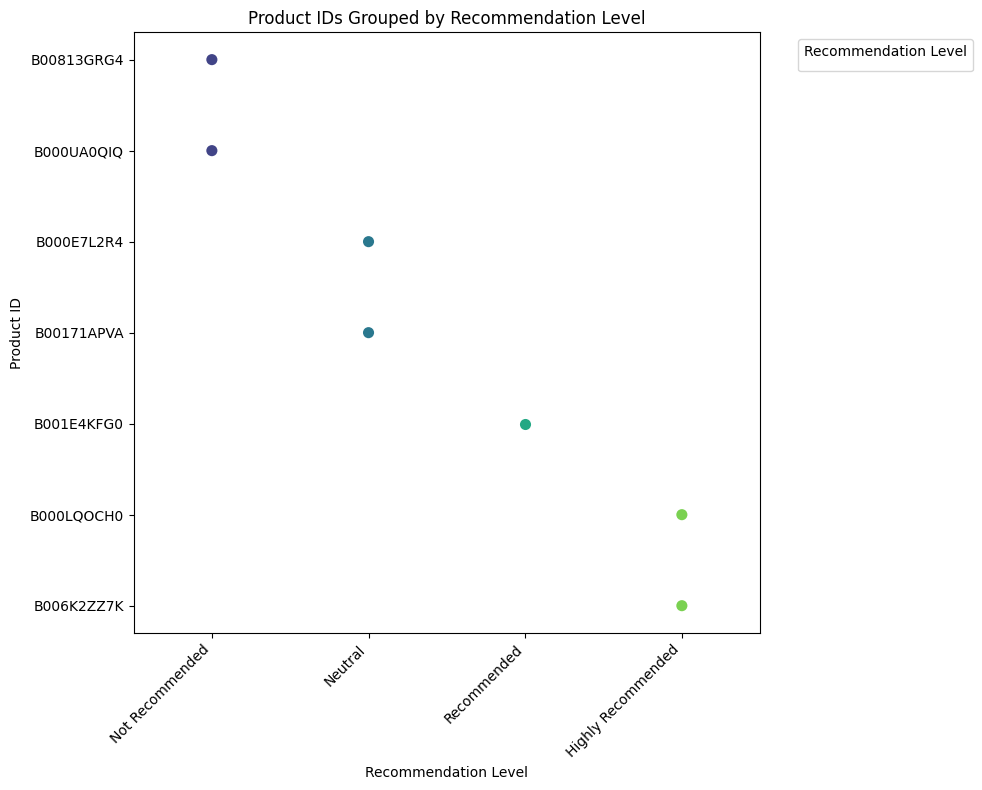

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_recommendations_sorted = df_recommendations.sort_values(by='Recommendation Level')

plt.figure(figsize=(10, 8)) # Adjust figure size as needed

sns.stripplot(data=df_recommendations_sorted, x='Recommendation Label', y='ProductId', hue='Recommendation Label', palette='viridis', size=8, jitter=False)

plt.title('Product IDs Grouped by Recommendation Level')
plt.xlabel('Recommendation Level')
plt.ylabel('Product ID')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Recommendation Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
!pip install matplotlib seaborn

import matplotlib.pyplot as plt
import seaborn as sns
import io
import pandas as pd


try:
    analysis_df = pd.read_csv(io.StringIO(analysis_response), sep='|', skiprows=[0, 2], skipinitialspace=True)

    analysis_df.columns = analysis_df.columns.str.strip()
    analysis_df = analysis_df.iloc[1:].copy() # Remove the extra separator row
    analysis_df = analysis_df.dropna(axis=1, how='all') # Drop empty columns

    if 'Product ID' in analysis_df.columns and 'Recommendation Level' in analysis_df.columns:

        recommendation_counts = analysis_df['Recommendation Level'].value_counts().reset_index()
        recommendation_counts.columns = ['Recommendation Level', 'Count']

        recommendation_order = ['Highly Recommended', 'Recommended', 'Neutral', 'Not Recommended']
        recommendation_counts['Recommendation Level'] = pd.Categorical(recommendation_counts['Recommendation Level'], categories=recommendation_order, ordered=True)
        recommendation_counts = recommendation_counts.sort_values('Recommendation Level')

        plt.figure(figsize=(10, 6))
        sns.barplot(x='Recommendation Level', y='Count', data=recommendation_counts, palette='viridis')
        plt.title('Number of Products by Recommendation Level')
        plt.xlabel('Recommendation Level')
        plt.ylabel('Number of Products')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("Error: 'Product ID' or 'Recommendation Level' column not found in the parsed analysis response.")
        print("Please check the column names in the analysis_response output.")
        print("Parsed DataFrame columns:", analysis_df.columns)

except Exception as e:
    print(f"Error parsing analysis response or plotting: {e}")
    print("Please inspect the format of your 'analysis_response' variable.")
    print("Analysis Response Content:")
    print(analysis_response)

Error: 'Product ID' or 'Recommendation Level' column not found in the parsed analysis response.
Please check the column names in the analysis_response output.
Parsed DataFrame columns: Index([], dtype='object')


In [ ]:

formatted_prompt_template_analysis = """
Analyze the following product reviews to identify potential improvements needed to increase sales. Focus on aspects that customers complained about or suggested.

Provide the output in a dataframe format with 3 columns: ProductId, Potential Improvements, and Impact on Sales.
Provide a brief explanation of the potential improvements and their impact on sales.

Product Reviews:
{product_reviews}

Analysis of Potential Improvements:
"""

if 'results' not in locals() and 'results' not in globals():
    print("Error: Variable 'results' not found. Please run the sentiment analysis cell first.")
else:
    combined_reviews_translated = "" # Variable name can remain the same
    for result in results: # Using results variable
         combined_reviews_translated += f"Product ID: {result['ProductId']}\nReview: {result['ReviewText']}\n\n" # Using original ReviewText


    formatted_prompt_analysis = formatted_prompt_template_analysis.format(product_reviews=combined_reviews_translated) # Variable name can remain the same

    try:
        analysis_response_improvements = output.invoke(formatted_prompt_analysis, parameters)
        print("\nAnalysis of Potential Improvements:") # Heading can remain the same
        print(analysis_response_improvements)



    except Exception as e:
        print(f"Error performing analysis for improvements: {e}")


Analysis of Potential Improvements:
| ProductId | Potential Improvements                                                                 | Impact on Sales                                                                                                                                                                       |
|-----------|-----------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| B000E7L2R4| None identified. Customers appreciate the product for its utility in providing cat grass. | Maintain current offering as it serves a niche market (pet owners) well, ensuring consistent availability and promoting it as a healthy option for pets. |
| B000LQOCH0| None identified. Review is overwhelmingly positive.                                 | Continue current production and 

In [ ]:
import io
import pandas as pd

try:
    # Split the response into lines
    lines = analysis_response_improvements.strip().split('\n')

    header_index = -1
    separator_index = -1
    for i, line in enumerate(lines):
        if 'ProductId' in line and 'Potential Improvements' in line and 'Impact on Sales' in line:
            header_index = i
        # Check if the line is a potential separator line (contains only -, |, :)
        if all(c in '-|: ' for c in line.strip()):
             separator_index = i
        if header_index != -1 and separator_index != -1 and separator_index == header_index + 1:
            break

    if header_index != -1 and separator_index != -1 and separator_index == header_index + 1:
        # Extract header and data lines
        header = [col.strip() for col in lines[header_index].strip('|').split('|')]
        data_lines = []
        # Iterate through lines after the separator to collect data rows
        for i in range(separator_index + 1, len(lines)):
            line = lines[i].strip()
            # Stop if an empty line or another separator line is encountered
            if not line or line.startswith('---') or all(c in '-|: ' for c in line):
                break
            # Split the line by '|' and add to data_lines if it has the correct number of columns
            row_data = [col.strip() for col in line.strip('|').split('|')]
            if len(row_data) == len(header):
                 data_lines.append(row_data)


        # Create the DataFrame
        df_improvements = pd.DataFrame(data_lines, columns=header)

        # Clean up whitespace in data cells
        for col in df_improvements.columns:
            df_improvements[col] = df_improvements[col].astype(str).str.strip()


        # Ensure the necessary columns exist after parsing and the DataFrame is not empty
        if 'ProductId' in df_improvements.columns and 'Potential Improvements' in df_improvements.columns and 'Impact on Sales' in df_improvements.columns and not df_improvements.empty:
            print("\nDataFrame Hasil Analisis Perbaikan Potensial:")
            display(df_improvements)
        else:
             print("Error: Required columns ('ProductId', 'Potential Improvements', 'Impact on Sales') not found in the parsed analysis response for improvements or DataFrame is empty.")
             print("Please check the column names and content in the analysis_response_improvements output.")


    else:
         print("Error: Could not find the header and separator rows in the expected format or output is incomplete.")
         print("Header index:", header_index)
         print("Separator index:", separator_index)


except Exception as e:
    print(f"Error parsing analysis response for improvements into DataFrame: {e}")
    print("Please inspect the format of your 'analysis_response_improvements' variable.")
    print("Analysis Response Content:")
    print(analysis_response_improvements)


DataFrame Hasil Analisis Perbaikan Potensial:


,ProductId,Potential Improvements,Impact on Sales
0,B000E7L2R4,None identified. Customers appreciate the prod...,Maintain current offering as it serves a niche...
1,B000LQOCH0,None identified. Review is overwhelmingly posi...,Continue current production and marketing stra...
2,B000UA0QIQ,Adjust flavor profile to reduce medicinal taste.,Modify the recipe to minimize the medicinal fl...
3,B00171APVA,None identified. Review praises the product's ...,Highlight the health benefits in marketing mat...
4,B001E4KFG0,None identified. Review appreciates the produc...,"Continue promoting the high-quality, stew-like..."
5,B006K2ZZ7K,Reduce the proportion of licorice-flavored pie...,Alter the assortment to include fewer licorice...
6,B006K2ZZ7K,"None identified. All reviews are positive, emp...","Maintain current production and marketing, foc..."
7,B00813GRG4,Ensure accurate labeling and size representation.,Address mislabeling concerns by implementing s...


/tmp/ipython-input-3-2687579978.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recommendation Label', y='Number of Products', data=recommendation_counts, palette='viridis')


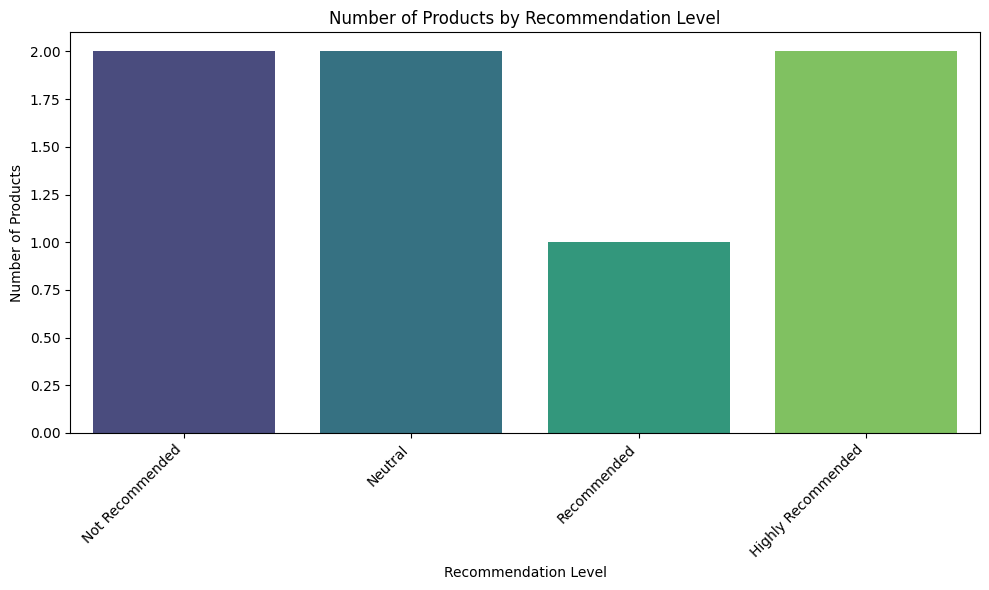

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of products in each recommendation category
recommendation_counts = df_recommendations['Recommendation Label'].value_counts().reset_index()
recommendation_counts.columns = ['Recommendation Label', 'Number of Products']

# Define the order of recommendation levels for the plot
recommendation_order = ['Not Recommended', 'Neutral', 'Recommended', 'Highly Recommended']
recommendation_counts['Recommendation Label'] = pd.Categorical(recommendation_counts['Recommendation Label'], categories=recommendation_order, ordered=True)
recommendation_counts = recommendation_counts.sort_values('Recommendation Label')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Recommendation Label', y='Number of Products', data=recommendation_counts, palette='viridis')
plt.title('Number of Products by Recommendation Level')
plt.xlabel('Recommendation Level')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-58-3866567268.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Improvement Category', y='Number of Products', data=improvement_counts, palette='Blues_d')


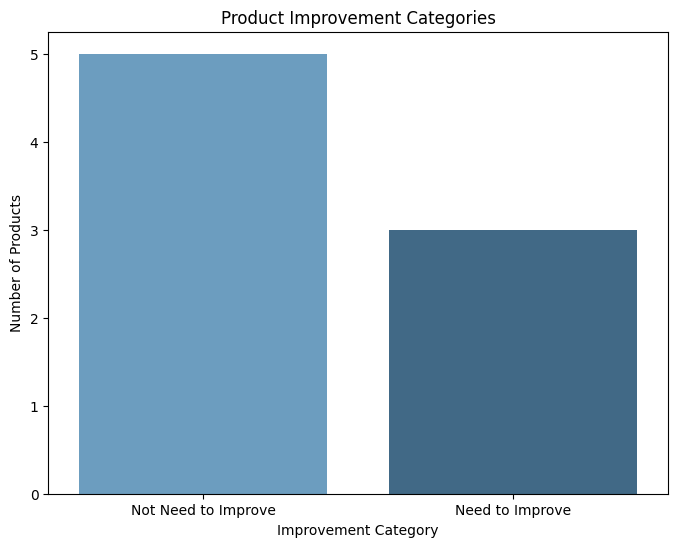

In [ ]:
# Classify products based on whether they need improvement
df_improvements['Improvement_Category'] = df_improvements['Potential Improvements'].apply(lambda x: 'Not Need to Improve' if 'None identified' in x else 'Need to Improve')

# Count the number of products in each category
improvement_counts = df_improvements['Improvement_Category'].value_counts().reset_index()
improvement_counts.columns = ['Improvement Category', 'Number of Products']

# Visualize the distribution of products in improvement categories
plt.figure(figsize=(8, 6))
sns.barplot(x='Improvement Category', y='Number of Products', data=improvement_counts, palette='Blues_d')
plt.title('Product Improvement Categories')
plt.xlabel('Improvement Category')
plt.ylabel('Number of Products')
plt.show()

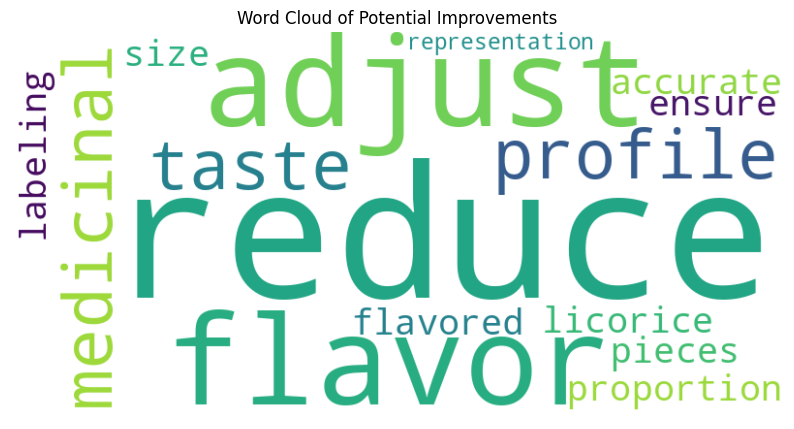

In [ ]:
from wordcloud import WordCloud
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

# Download nltk stopwords if not already downloaded
try:
    nltk.data.find('corpora/stopwords')
except nltk.downloader.DownloadError:
    nltk.download('stopwords')

# Combine all 'Potential Improvements' text excluding 'None identified'
improvement_text = ' '.join(df_improvements[df_improvements['Improvement_Category'] == 'Need to Improve']['Potential Improvements'].tolist())

# Remove 'None identified' and common English stop words
stop_words = set(stopwords.words('english'))
# Add "none identified" and any other terms to exclude
stop_words.add("none identified")
stop_words.add("product") # Add "product" as it might be frequent but not insightful

# Tokenize the text and remove stop words and punctuation
words = re.findall(r'\b\w+\b', improvement_text.lower())
filtered_words = [word for word in words if word not in stop_words]

# Count word frequencies
word_counts = Counter(filtered_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Potential Improvements')
plt.show()
